# TD NOTÉ
## Python For Data Analysis

### Groupe :

Steven LE MOAL, Aurelien AURUS, Noame CYTERMANN

### Objectif :

Découvrir une nouvelle base de données, se l’approprier, la nettoyer,l’explorer, la retravailler et l’enrichir.

### Bases de données :

Base de données 'Dans Ma Rue - Anomalies signalées' (en CSV):

Lien : https://opendata.paris.fr/explore/dataset/dans-ma-rue/export/?disjunctive.type&disjunctive.soustype&disjunctive.code_postal&disjunctive.arrondissement&disjunctive.conseilquartier&disjunctive.prefixe&disjunctive.intervenant

Base de données 'Logement - Encadrement des loyers' (en CSV):

Lien : https://opendata.paris.fr/explore/dataset/logement-encadrement-des-loyers/information/?disjunctive.annee&disjunctive.id_zone&disjunctive.nom_quartier&disjunctive.piece&disjunctive.epoque&disjunctive.meuble_txt
    

Base de données : 'Arrondissement' (UNIQUEMENT pour les cartes) (en geoJSON):

Lien : https://opendata.paris.fr/explore/dataset/arrondissements/export/?disjunctive.c_ar&disjunctive.c_arinsee&disjunctive.l_ar

## Première partie

On importe les librairies que l'on va utiliser :

In [618]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#!pip install folium
import folium
#!pip install geopandas
import geopandas as gpd
import seaborn as sns

In [437]:
geo = gpd.read_file("arrondissements.geojson")
geo.head(1)

c_ar l_aroff       surface       l_ar    n_sq_co  c_arinsee    n_sq_ar  \
0     3  Temple  1.170883e+06  3ème Ardt  750001537      75103  750000003   

     perimetre                                           geometry  
0  4519.263648  POLYGON ((2.36383 48.86750, 2.36389 48.86747, ...

In [438]:
geo = geo[['c_ar','geometry']]
geo = geo.rename(columns={'c_ar':'ARRONDISSEMENT','geometry':"GEO_ARRONDISSEMENT"})
geo.head(1)

ARRONDISSEMENT                                 GEO_ARRONDISSEMENT
0               3  POLYGON ((2.36383 48.86750, 2.36389 48.86747, ...

https://geojson.org

#### Importation et exploration du dataset 'Dans Ma Rue - Anomalies signalées'

In [439]:
dansmarue = pd.read_csv("dans-ma-rue.csv",sep=";")
dansmarue.head()

ID DECLARATION         TYPE DECLARATION  \
0           57678  Voirie et espace public   
1           57688        Objets abandonnés   
2           57690   Autos, motos, vélos...   
3           57696                 Propreté   
4           57721        Objets abandonnés   

                               SOUS TYPE DECLARATION  \
0  Chaussées:Affaissement, trou, bosse, pavé arraché   
1                                            Cartons   
2        Deux-roues motorisé en stationnement gênant   
3                    Déchets et/ou salissures divers   
4               Autres objets encombrants abandonnés   

                                         ADRESSE  CODE POSTAL     VILLE  \
0                 4 Rue Michel Ange, 75016 PARIS        75016  Paris 16   
1            42 Rue de Ménilmontant, 75020 PARIS        75020  Paris 20   
2  250 Rue du Faubourg Saint-Martin, 75010 PARIS        75010  Paris 10   
3                       5 Rue Amyot, 75005 PARIS        75005   Paris 5   
4                   2 Place Nattier, 75018 PARIS        75018  Paris 18   

   ARRONDISSEMENT         CONSEIL DE QUARTIER DATE DECLARATION  \
0              16                 AUTEUIL SUD       2021-06-21   
1              20    AMANDIERS - MENILMONTANT       2021-06-21   
2              10       LOUIS BLANC - AQUEDUC       2021-06-21   
3               5                VAL DE GRACE       2021-06-21   
4              18  GRANDES CARRIERES - CLICHY       2021-06-21   

   ANNEE DECLARATION  MOIS DECLARATION                     OUTIL SOURCE  \
0               2021                 6                           Androï   
1               2021                 6  IOPage DMR Paris.fr application   
2               2021                 6  IOPage DMR Paris.fr application   
3               2021                 6                           Androï   
4               2021                 6                           Androï   

                                  INTERVENANT        ID_DMR  \
0                                         DVD  G2021F057678   
1                                 DPE-STPP-DT  A2021F057688   
2                                   DPMP-SCOP  A2021F057690   
3                                 DPE-STPP-DT  G2021F057696   
4  Ramen en tant que prestataire de DansMaRue  G2021F057721   

                                           geo_shape  \
0  {"coordinates": [2.2634281943754324, 48.847420...   
1  {"coordinates": [2.3868381962073455, 48.867847...   
2  {"coordinates": [2.367089998038939, 48.8824579...   
3  {"coordinates": [2.3472554966525943, 48.843315...   
4  {"coordinates": [2.333310996997104, 48.8901140...   

                            geo_point_2d mois_annee_decla  
0  48.847420001993505,2.2634281943754324          2021-06  
1   48.86784700313035,2.3868381962073455          2021-06  
2     48.8824579958073,2.367089998038939          2021-06  
3   48.84331500236986,2.3472554966525943          2021-06  
4    48.89011400245742,2.333310996997104          2021-06

In [440]:
dansmarue.shape

(963326, 17)

In [441]:
dansmarue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963326 entries, 0 to 963325
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ID DECLARATION         963326 non-null  int64 
 1   TYPE DECLARATION       963326 non-null  object
 2   SOUS TYPE DECLARATION  963326 non-null  object
 3   ADRESSE                963325 non-null  object
 4   CODE POSTAL            963326 non-null  int64 
 5   VILLE                  963326 non-null  object
 6   ARRONDISSEMENT         963326 non-null  int64 
 7   CONSEIL DE QUARTIER    963273 non-null  object
 8   DATE DECLARATION       963326 non-null  object
 9   ANNEE DECLARATION      963326 non-null  int64 
 10  MOIS DECLARATION       963326 non-null  int64 
 11  OUTIL SOURCE           963326 non-null  object
 12  INTERVENANT            961366 non-null  object
 13  ID_DMR                 963326 non-null  object
 14  geo_shape              963326 non-null  object
 15  

In [442]:
dansmarue.describe()

ID DECLARATION    CODE POSTAL  ARRONDISSEMENT  ANNEE DECLARATION  \
count   963326.000000  963326.000000   963326.000000      963326.000000   
mean     38704.033419   75012.832684       12.978562        2021.483966   
std      22784.115914       5.471299        5.175245           0.499743   
min          1.000000   75001.000000        1.000000        2021.000000   
25%      19105.000000   75010.000000       10.000000        2021.000000   
50%      38635.000000   75013.000000       13.000000        2021.000000   
75%      57395.000000   75018.000000       18.000000        2022.000000   
max      91731.000000   75020.000000       20.000000        2022.000000   

       MOIS DECLARATION  
count     963326.000000  
mean           6.520660  
std            3.237572  
min            1.000000  
25%            4.000000  
50%            6.000000  
75%            9.000000  
max           12.000000

#### Importation et exploration du dataset 'Logement - Encadrement des loyers'

In [443]:
enloyer = pd.read_csv("logement-encadrement-des-loyers.csv",sep=";")
enloyer.head()

Année  Secteurs géographiques  Numéro du quartier      Nom du quartier  \
0   2020                       5                  33        Saint-Georges   
1   2020                       1                  28         Gros-Caillou   
2   2020                       2                  29       Champs-Elysées   
3   2020                       2                  34     Chaussée-d'Antin   
4   2020                       5                  35  Faubourg-Montmartre   

   Nombre de pièces principales Epoque de construction Type de location  \
0                             2              1946-1970       non meublé   
1                             2              1971-1990           meublé   
2                             1             Avant 1946       non meublé   
3                             3              1946-1970           meublé   
4                             4              1971-1990       non meublé   

   Loyers de référence  Loyers de référence majorés  \
0                 23.7                        28.44   
1                 30.2                        36.24   
2                 32.7                        39.24   
3                 24.5                        29.40   
4                 21.7                        26.04   

   Loyers de référence minorés  Ville  Numéro INSEE du quartier  \
0                        16.59  PARIS                   7510933   
1                        21.14  PARIS                   7510728   
2                        22.89  PARIS                   7510829   
3                        17.15  PARIS                   7510934   
4                        15.19  PARIS                   7510935   

                                           geo_shape  \
0  {"coordinates": [[[2.3392285502760473, 48.8767...   
1  {"coordinates": [[[2.309544250136154, 48.85395...   
2  {"coordinates": [[[2.306463844245763, 48.87014...   
3  {"coordinates": [[[2.335450084489445, 48.87683...   
4  {"coordinates": [[[2.340255299125085, 48.87660...   

                            geo_point_2d  
0   48.879934338782526,2.332850196555468  
1  48.858299903878766,2.3015415556941905  
2   48.86707449218534,2.3086516846813985  
3   48.87354738020909,2.3322688688697006  
4   48.873934691758095,2.343252579473341

In [444]:
enloyer.shape

(10240, 14)

In [445]:
enloyer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Année                         10240 non-null  int64  
 1   Secteurs géographiques        10240 non-null  int64  
 2   Numéro du quartier            10240 non-null  int64  
 3   Nom du quartier               10240 non-null  object 
 4   Nombre de pièces principales  10240 non-null  int64  
 5   Epoque de construction        10240 non-null  object 
 6   Type de location              10240 non-null  object 
 7   Loyers de référence           10240 non-null  float64
 8   Loyers de référence majorés   10240 non-null  float64
 9   Loyers de référence minorés   10240 non-null  float64
 10  Ville                         10240 non-null  object 
 11  Numéro INSEE du quartier      10240 non-null  int64  
 12  geo_shape                     10240 non-null  object 
 13  g

In [446]:
enloyer.describe()

Année  Secteurs géographiques  Numéro du quartier  \
count  10240.000000            10240.000000        10240.000000   
mean    2020.500000                6.662500           40.500000   
std        1.118089                4.224966           23.093334   
min     2019.000000                1.000000            1.000000   
25%     2019.750000                3.000000           20.750000   
50%     2020.500000                5.000000           40.500000   
75%     2021.250000               11.000000           60.250000   
max     2022.000000               14.000000           80.000000   

       Nombre de pièces principales  Loyers de référence  \
count                  10240.000000         10240.000000   
mean                       2.500000            25.829805   
std                        1.118089             4.202257   
min                        1.000000            14.300000   
25%                        1.750000            23.000000   
50%                        2.500000            25.500000   
75%                        3.250000            28.500000   
max                        4.000000            39.600000   

       Loyers de référence majorés  Loyers de référence minorés  \
count                 10240.000000                 10240.000000   
mean                     30.996164                    18.082487   
std                       5.042818                     2.941352   
min                      17.160000                    10.010000   
25%                      27.600000                    16.100000   
50%                      30.600000                    17.850000   
75%                      34.200000                    19.950000   
max                      47.520000                    27.720000   

       Numéro INSEE du quartier  
count              1.024000e+04  
mean               7.511090e+06  
std                5.997236e+02  
min                7.510101e+06  
25%                7.510596e+06  
50%                7.511090e+06  
75%                7.511585e+06  
max                7.512080e+06

## Deuxième partie

#### Conversion/cleaning de la donnée : 'Dans Ma Rue - Anomalies signalées'

In [447]:
dansmarue.head()

ID DECLARATION         TYPE DECLARATION  \
0           57678  Voirie et espace public   
1           57688        Objets abandonnés   
2           57690   Autos, motos, vélos...   
3           57696                 Propreté   
4           57721        Objets abandonnés   

                               SOUS TYPE DECLARATION  \
0  Chaussées:Affaissement, trou, bosse, pavé arraché   
1                                            Cartons   
2        Deux-roues motorisé en stationnement gênant   
3                    Déchets et/ou salissures divers   
4               Autres objets encombrants abandonnés   

                                         ADRESSE  CODE POSTAL     VILLE  \
0                 4 Rue Michel Ange, 75016 PARIS        75016  Paris 16   
1            42 Rue de Ménilmontant, 75020 PARIS        75020  Paris 20   
2  250 Rue du Faubourg Saint-Martin, 75010 PARIS        75010  Paris 10   
3                       5 Rue Amyot, 75005 PARIS        75005   Paris 5   
4                   2 Place Nattier, 75018 PARIS        75018  Paris 18   

   ARRONDISSEMENT         CONSEIL DE QUARTIER DATE DECLARATION  \
0              16                 AUTEUIL SUD       2021-06-21   
1              20    AMANDIERS - MENILMONTANT       2021-06-21   
2              10       LOUIS BLANC - AQUEDUC       2021-06-21   
3               5                VAL DE GRACE       2021-06-21   
4              18  GRANDES CARRIERES - CLICHY       2021-06-21   

   ANNEE DECLARATION  MOIS DECLARATION                     OUTIL SOURCE  \
0               2021                 6                           Androï   
1               2021                 6  IOPage DMR Paris.fr application   
2               2021                 6  IOPage DMR Paris.fr application   
3               2021                 6                           Androï   
4               2021                 6                           Androï   

                                  INTERVENANT        ID_DMR  \
0                                         DVD  G2021F057678   
1                                 DPE-STPP-DT  A2021F057688   
2                                   DPMP-SCOP  A2021F057690   
3                                 DPE-STPP-DT  G2021F057696   
4  Ramen en tant que prestataire de DansMaRue  G2021F057721   

                                           geo_shape  \
0  {"coordinates": [2.2634281943754324, 48.847420...   
1  {"coordinates": [2.3868381962073455, 48.867847...   
2  {"coordinates": [2.367089998038939, 48.8824579...   
3  {"coordinates": [2.3472554966525943, 48.843315...   
4  {"coordinates": [2.333310996997104, 48.8901140...   

                            geo_point_2d mois_annee_decla  
0  48.847420001993505,2.2634281943754324          2021-06  
1   48.86784700313035,2.3868381962073455          2021-06  
2     48.8824579958073,2.367089998038939          2021-06  
3   48.84331500236986,2.3472554966525943          2021-06  
4    48.89011400245742,2.333310996997104          2021-06

On vérifie les valeurs nuls / manquantes

In [448]:
dansmarue.isna().sum()

ID DECLARATION              0
TYPE DECLARATION            0
SOUS TYPE DECLARATION       0
ADRESSE                     1
CODE POSTAL                 0
VILLE                       0
ARRONDISSEMENT              0
CONSEIL DE QUARTIER        53
DATE DECLARATION            0
ANNEE DECLARATION           0
MOIS DECLARATION            0
OUTIL SOURCE                0
INTERVENANT              1960
ID_DMR                      0
geo_shape                   0
geo_point_2d                0
mois_annee_decla            0
dtype: int64

In [449]:
dansmarue["VILLE"].unique

<bound method Series.unique of 0         Paris 16
1         Paris 20
2         Paris 10
3          Paris 5
4         Paris 18
            ...   
963321    Paris 19
963322     Paris 5
963323    Paris 16
963324     Paris 1
963325    Paris 15
Name: VILLE, Length: 963326, dtype: object>

On drop les colones dont on a pas besoin :

    - ID DECLARATION : n'apporte pas d'information
    
    - ADRESSE : on a les coordonnées géographiques (une colonne spéciale sera crée)
    
    - CODE POSTAL : on est à Paris et on a déjà la colonne arrondissement
    
    - VILLE : n'apporte pas d'information supplémentaire
    
    - ANNEE DECLARATION : on a une colonne date (annee/mois/jour)
    
    - MOIS DECLARATION : on a une colonne date (annee/mois/jour)
    
df['year...'] = df['Date...'].dt.year

df['month..'] = df['Date...'].dt.month
    
    - OUTIL SOURCE : n'est pas utile pour notre étude (et jointure)
    
    - INTERVENANT : n'est pas utile pour notre étude (et jointure)
    
    - ID_DMR : n'apporte pas d'information supplémentaire
    
    - mois_annee_decla : information redonddante (colonne de date existe déjà)

In [450]:
dansmarue = dansmarue.drop(["ID DECLARATION","ADRESSE","CODE POSTAL","VILLE","ANNEE DECLARATION","MOIS DECLARATION","OUTIL SOURCE","INTERVENANT","ID_DMR","mois_annee_decla"], axis=1)
dansmarue.head()

TYPE DECLARATION                              SOUS TYPE DECLARATION  \
0  Voirie et espace public  Chaussées:Affaissement, trou, bosse, pavé arraché   
1        Objets abandonnés                                            Cartons   
2   Autos, motos, vélos...        Deux-roues motorisé en stationnement gênant   
3                 Propreté                    Déchets et/ou salissures divers   
4        Objets abandonnés               Autres objets encombrants abandonnés   

   ARRONDISSEMENT         CONSEIL DE QUARTIER DATE DECLARATION  \
0              16                 AUTEUIL SUD       2021-06-21   
1              20    AMANDIERS - MENILMONTANT       2021-06-21   
2              10       LOUIS BLANC - AQUEDUC       2021-06-21   
3               5                VAL DE GRACE       2021-06-21   
4              18  GRANDES CARRIERES - CLICHY       2021-06-21   

                                           geo_shape  \
0  {"coordinates": [2.2634281943754324, 48.847420...   
1  {"coordinates": [2.3868381962073455, 48.867847...   
2  {"coordinates": [2.367089998038939, 48.8824579...   
3  {"coordinates": [2.3472554966525943, 48.843315...   
4  {"coordinates": [2.333310996997104, 48.8901140...   

                            geo_point_2d  
0  48.847420001993505,2.2634281943754324  
1   48.86784700313035,2.3868381962073455  
2     48.8824579958073,2.367089998038939  
3   48.84331500236986,2.3472554966525943  
4    48.89011400245742,2.333310996997104

On fait le choix de ne pas changer le nom des colonnes car ils sont bien représentatif

In [451]:
dansmarue.columns = dansmarue.columns.str.replace(' ','_')
dansmarue.columns = dansmarue.columns.str.upper()

On réalise la conversion des colonnes

In [452]:
dansmarue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963326 entries, 0 to 963325
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   TYPE_DECLARATION       963326 non-null  object
 1   SOUS_TYPE_DECLARATION  963326 non-null  object
 2   ARRONDISSEMENT         963326 non-null  int64 
 3   CONSEIL_DE_QUARTIER    963273 non-null  object
 4   DATE_DECLARATION       963326 non-null  object
 5   GEO_SHAPE              963326 non-null  object
 6   GEO_POINT_2D           963326 non-null  object
dtypes: int64(1), object(6)
memory usage: 51.4+ MB


In [453]:
cols = ["TYPE_DECLARATION","SOUS_TYPE_DECLARATION","CONSEIL_DE_QUARTIER"]
dansmarue[cols] = dansmarue[cols].astype('string')
dansmarue['DATE_DECLARATION'] = pd.to_datetime(dansmarue['DATE_DECLARATION'], format='%Y-%m-%d')
dansmarue['GEO_POINT_2D'] = dansmarue['GEO_POINT_2D'].apply(lambda x : x.split(','))
dansmarue = geo.merge(dansmarue, on ='ARRONDISSEMENT')
dansmarue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963326 entries, 0 to 963325
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ARRONDISSEMENT         963326 non-null  int64         
 1   GEO_ARRONDISSEMENT     963326 non-null  geometry      
 2   TYPE_DECLARATION       963326 non-null  string        
 3   SOUS_TYPE_DECLARATION  963326 non-null  string        
 4   CONSEIL_DE_QUARTIER    963273 non-null  string        
 5   DATE_DECLARATION       963326 non-null  datetime64[ns]
 6   GEO_SHAPE              963326 non-null  object        
 7   GEO_POINT_2D           963326 non-null  object        
dtypes: datetime64[ns](1), geometry(1), int64(1), object(2), string(3)
memory usage: 66.1+ MB


#### Conversion/cleaning de la donnée : 'Logement - Encadrement des loyers'

In [454]:
enloyer.head()

Année  Secteurs géographiques  Numéro du quartier      Nom du quartier  \
0   2020                       5                  33        Saint-Georges   
1   2020                       1                  28         Gros-Caillou   
2   2020                       2                  29       Champs-Elysées   
3   2020                       2                  34     Chaussée-d'Antin   
4   2020                       5                  35  Faubourg-Montmartre   

   Nombre de pièces principales Epoque de construction Type de location  \
0                             2              1946-1970       non meublé   
1                             2              1971-1990           meublé   
2                             1             Avant 1946       non meublé   
3                             3              1946-1970           meublé   
4                             4              1971-1990       non meublé   

   Loyers de référence  Loyers de référence majorés  \
0                 23.7                        28.44   
1                 30.2                        36.24   
2                 32.7                        39.24   
3                 24.5                        29.40   
4                 21.7                        26.04   

   Loyers de référence minorés  Ville  Numéro INSEE du quartier  \
0                        16.59  PARIS                   7510933   
1                        21.14  PARIS                   7510728   
2                        22.89  PARIS                   7510829   
3                        17.15  PARIS                   7510934   
4                        15.19  PARIS                   7510935   

                                           geo_shape  \
0  {"coordinates": [[[2.3392285502760473, 48.8767...   
1  {"coordinates": [[[2.309544250136154, 48.85395...   
2  {"coordinates": [[[2.306463844245763, 48.87014...   
3  {"coordinates": [[[2.335450084489445, 48.87683...   
4  {"coordinates": [[[2.340255299125085, 48.87660...   

                            geo_point_2d  
0   48.879934338782526,2.332850196555468  
1  48.858299903878766,2.3015415556941905  
2   48.86707449218534,2.3086516846813985  
3   48.87354738020909,2.3322688688697006  
4   48.873934691758095,2.343252579473341

On vérifie les valeurs nuls / manquantes

In [455]:
enloyer.isna().sum()

Année                           0
Secteurs géographiques          0
Numéro du quartier              0
Nom du quartier                 0
Nombre de pièces principales    0
Epoque de construction          0
Type de location                0
Loyers de référence             0
Loyers de référence majorés     0
Loyers de référence minorés     0
Ville                           0
Numéro INSEE du quartier        0
geo_shape                       0
geo_point_2d                    0
dtype: int64

In [456]:
enloyer["Ville"].unique()

array(['PARIS'], dtype=object)

In [457]:
enloyer["Secteurs géographiques"].unique()

array([ 5,  1,  2, 14, 11, 10, 13,  3,  6,  7, 12,  8,  9,  4])

On drop les colonnes que l'on a pas besoin :

    - Secteurs géographiques : on a les coordonnées géographiques
    
    - Ville : on est à Paris
    
    - Numéro du quartier : on a les coordonnées géographiques
    
    - Nom du quartier : on a le numéro INSEE du quartier
    
    (A noter : il n'y a pas de dataset qui fait la correspondance nom/numéro de quartier et conseil de quartier du dataset dansmarue, donc on va utiliser les coordonnées pour s'aider lors des jonctions)

In [458]:
enloyer = enloyer.drop(["Secteurs géographiques","Ville","Numéro du quartier","Nom du quartier"], axis=1)
enloyer.head()

Année  Nombre de pièces principales Epoque de construction  \
0   2020                             2              1946-1970   
1   2020                             2              1971-1990   
2   2020                             1             Avant 1946   
3   2020                             3              1946-1970   
4   2020                             4              1971-1990   

  Type de location  Loyers de référence  Loyers de référence majorés  \
0       non meublé                 23.7                        28.44   
1           meublé                 30.2                        36.24   
2       non meublé                 32.7                        39.24   
3           meublé                 24.5                        29.40   
4       non meublé                 21.7                        26.04   

   Loyers de référence minorés  Numéro INSEE du quartier  \
0                        16.59                   7510933   
1                        21.14                   7510728   
2                        22.89                   7510829   
3                        17.15                   7510934   
4                        15.19                   7510935   

                                           geo_shape  \
0  {"coordinates": [[[2.3392285502760473, 48.8767...   
1  {"coordinates": [[[2.309544250136154, 48.85395...   
2  {"coordinates": [[[2.306463844245763, 48.87014...   
3  {"coordinates": [[[2.335450084489445, 48.87683...   
4  {"coordinates": [[[2.340255299125085, 48.87660...   

                            geo_point_2d  
0   48.879934338782526,2.332850196555468  
1  48.858299903878766,2.3015415556941905  
2   48.86707449218534,2.3086516846813985  
3   48.87354738020909,2.3322688688697006  
4   48.873934691758095,2.343252579473341

On fait le choix de ne pas changer le nom des colonnes car ils sont bien représentatif à par une

In [459]:
enloyer.columns = enloyer.columns.str.replace(' ','_')
enloyer.columns = enloyer.columns.str.replace('é','e')
enloyer.columns = enloyer.columns.str.replace('è','e')
enloyer.columns = enloyer.columns.str.upper()
enloyer.rename(columns = {'TYPE_DE_LOCATION':'MEUBLER'}, inplace = True)

On réalise la conversion des colonnes

In [460]:
enloyer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ANNEE                         10240 non-null  int64  
 1   NOMBRE_DE_PIECES_PRINCIPALES  10240 non-null  int64  
 2   EPOQUE_DE_CONSTRUCTION        10240 non-null  object 
 3   MEUBLER                       10240 non-null  object 
 4   LOYERS_DE_REFERENCE           10240 non-null  float64
 5   LOYERS_DE_REFERENCE_MAJORES   10240 non-null  float64
 6   LOYERS_DE_REFERENCE_MINORES   10240 non-null  float64
 7   NUMERO_INSEE_DU_QUARTIER      10240 non-null  int64  
 8   GEO_SHAPE                     10240 non-null  object 
 9   GEO_POINT_2D                  10240 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 800.1+ KB


In [461]:
enloyer["MEUBLER"].unique()

array(['non meublé', 'meublé'], dtype=object)

In [462]:
d = {'non meublé':False,'meublé':True}
enloyer["MEUBLER"] = enloyer["MEUBLER"].replace(d)

In [463]:
enloyer["EPOQUE_DE_CONSTRUCTION"].unique()

array(['1946-1970', '1971-1990', 'Avant 1946', 'Apres 1990'], dtype=object)

In [464]:
enloyer["ANNEE"] = pd.to_datetime(enloyer["ANNEE"], format='%Y')
enloyer["MEUBLER"] = enloyer["MEUBLER"].astype('bool')
enloyer['GEO_POINT_2D'] = enloyer['GEO_POINT_2D'].apply(lambda x : x.split(','))
enloyer["ARRONDISSEMENT"] = enloyer["NUMERO_INSEE_DU_QUARTIER"].apply(lambda x : int(str(x)[3:5]))
enloyer.drop(["NUMERO_INSEE_DU_QUARTIER"],axis=1)
enloyer = geo.merge(enloyer, on ='ARRONDISSEMENT')
enloyer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10240 entries, 0 to 10239
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ARRONDISSEMENT                10240 non-null  int64         
 1   GEO_ARRONDISSEMENT            10240 non-null  geometry      
 2   ANNEE                         10240 non-null  datetime64[ns]
 3   NOMBRE_DE_PIECES_PRINCIPALES  10240 non-null  int64         
 4   EPOQUE_DE_CONSTRUCTION        10240 non-null  object        
 5   MEUBLER                       10240 non-null  bool          
 6   LOYERS_DE_REFERENCE           10240 non-null  float64       
 7   LOYERS_DE_REFERENCE_MAJORES   10240 non-null  float64       
 8   LOYERS_DE_REFERENCE_MINORES   10240 non-null  float64       
 9   NUMERO_INSEE_DU_QUARTIER      10240 non-null  int64         
 10  GEO_SHAPE                     10240 non-null  object        
 11  GEO_POINT_2D                

#### Premières visualisations : 'Dans Ma Rue - Anomalies signalées'

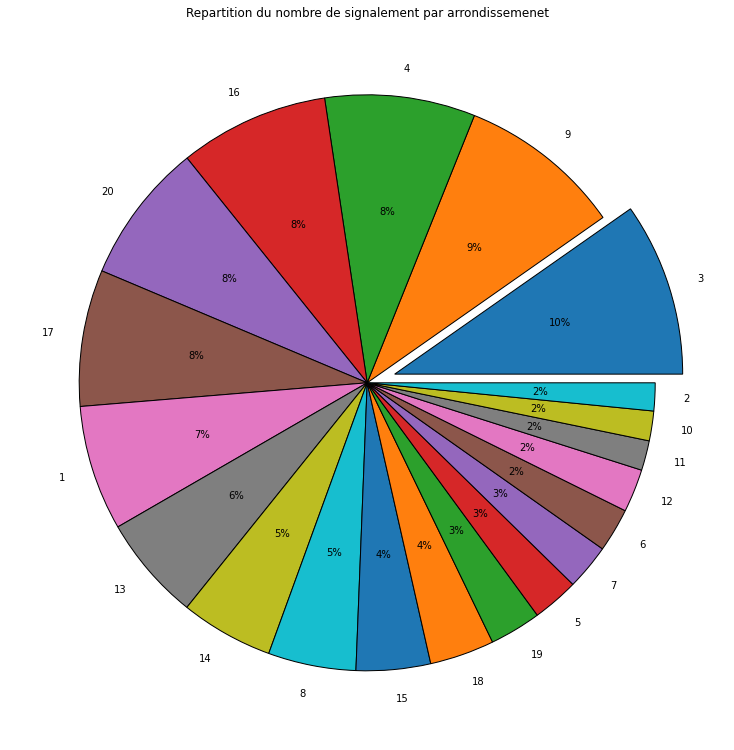

In [517]:
slices = dansmarue["ARRONDISSEMENT"].value_counts()
labels = dansmarue["ARRONDISSEMENT"].unique()

explode=[0.1]
for i in range(1, len(dansmarue["ARRONDISSEMENT"].unique())):
    explode.append(0)

fig = plt.figure(figsize=(10,10))
axes = fig.add_axes([0, 0, 1, 1], aspect=1)
axes.pie(slices, labels=labels,wedgeprops={'edgecolor':'black'},explode=explode,autopct='%1.0f%%')
axes.set_title("Repartition du nombre de signalement par arrondissemenet")
plt.show()

On peut voir que 6 arrondissement (sur 20) correspondent à 50% des signalements



In [466]:
df = pd.DataFrame()
df = dansmarue["ARRONDISSEMENT"].value_counts()
df = df.sort_values(ascending = False)
df.head(6).sum()/df.sum()

0.5131326259231039

In [530]:
df = pd.DataFrame()
df = dansmarue["ARRONDISSEMENT"].value_counts()
df = df.reset_index()
df = df.rename(columns ={"index":"ARRONDISSEMENT","ARRONDISSEMENT":"SIGNALEMENT"})
df = geo.merge(df,on='ARRONDISSEMENT')
df1 = gpd.GeoDataFrame(df, geometry='GEO_ARRONDISSEMENT')

paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
paris.choropleth(geo_data = df1,
                 name='Nombre de Signalement par arrondissement',
                 data = df1, 
                 columns = ['ARRONDISSEMENT', 'SIGNALEMENT'],
                 key_on = 'feature.properties.ARRONDISSEMENT',
                 fill_color='YlOrRd',
                 fill_opacity=0.6, 
                 line_opacity=0.1,
                 legend_name='Nombre de Signalement par arrondissement', 
                 smooth_factor=0,
                 highlight=True)

SuburbName = folium.features.GeoJson(
    df1,
    control=False,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['ARRONDISSEMENT'
                ,'SIGNALEMENT'
               ],
        aliases=['Arrondissement: '
                ,'Signalement: '
                 ],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
paris.add_child(SuburbName)
paris.keep_in_front(SuburbName)
#folium.LayerControl().add_to(paris)

paris

/Users/steven/opt/anaconda3/lib/python3.9/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## note :
- on devrait calculer la densité, le nombre de signalement est proportionnel a l'air des arrondissements

...

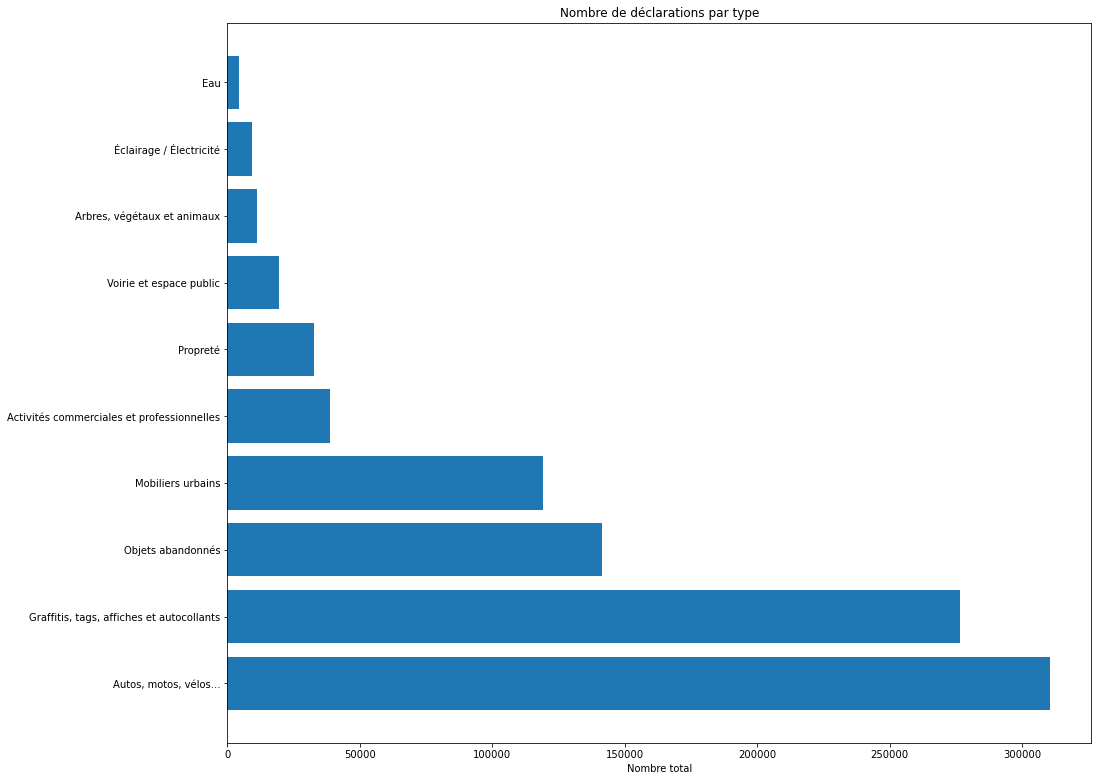

In [518]:
values1 = dansmarue["TYPE_DECLARATION"].value_counts().to_numpy()
keys1 = dansmarue["TYPE_DECLARATION"].unique()

fig = plt.figure(figsize=(12,10))
axes = fig.add_axes([0,0,1,1])
axes.barh(keys1, values1)
axes.set_title("Nombre de déclarations par type")
axes.set_xlabel("Nombre total")
#axes.set_ylabel("Type de déclaration")
#fig.tight_layout()
plt.show()

Une déclaration est concerne en général une des quatre types de déclaration :

In [519]:
df = dansmarue["TYPE_DECLARATION"].value_counts()
df = df.sort_values(ascending = False)
df_sum = df.sum()
df.apply(lambda x : x/df_sum).head(4)

Objets abandonnés                            0.322310
Graffitis, tags, affiches et autocollants    0.286822
Propreté                                     0.146625
Autos, motos, vélos...                       0.123720
Name: TYPE_DECLARATION, dtype: float64

...

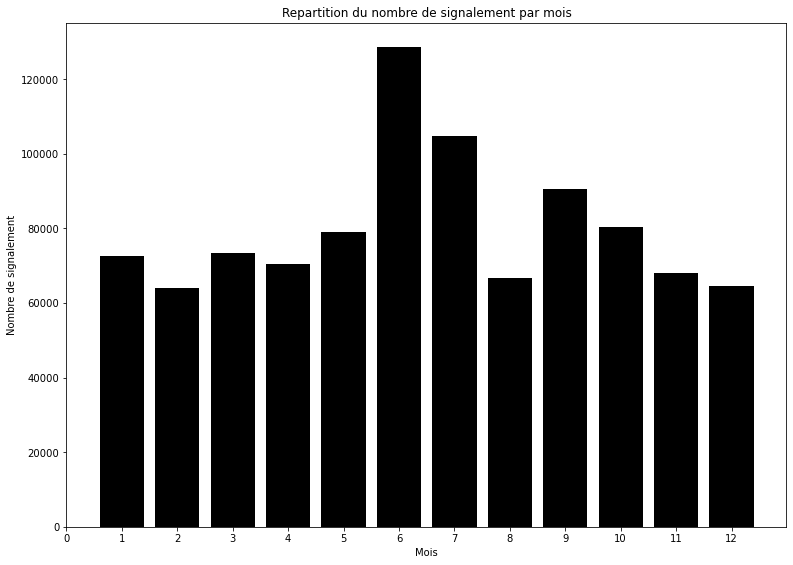

In [520]:
slices = dansmarue["DATE_DECLARATION"].dt.month.value_counts()
slices = slices.sort_index()

fig = plt.figure(figsize=(10,7))
axes = fig.add_axes([0,0,1,1])
axes.bar(np.arange(1,13),slices, color='k')
axes.set_xticks(range(13))
axes.set_xlabel("Mois")
axes.set_ylabel("Nombre de signalement")
axes.set_title("Repartition du nombre de signalement par mois")
plt.show()


Il y a un pics de signelement en été, en particulier en Juin.

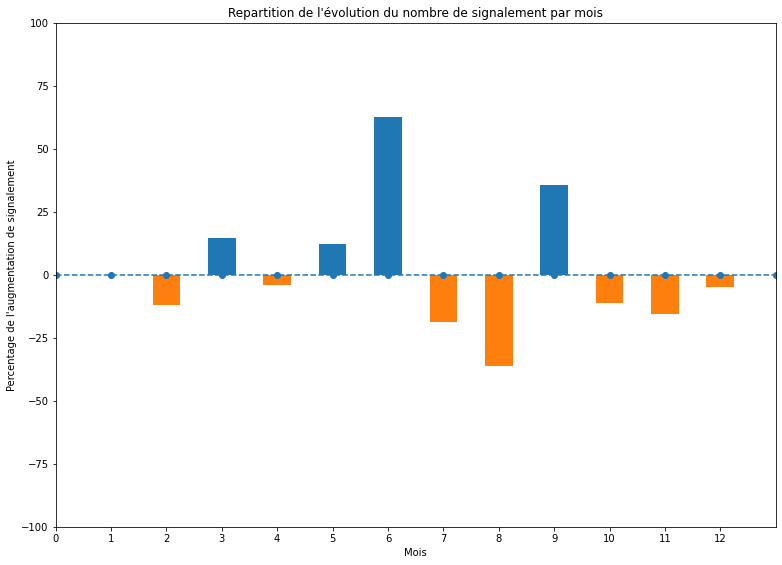

In [529]:
df2 = pd.DataFrame(dansmarue["DATE_DECLARATION"].dt.month.value_counts())
df2 = df2.sort_index()
df2["AUGMENTATION"] = df2["DATE_DECLARATION"].pct_change()*100
df2.iloc[0,1] = 0
df2["color"] = (df2["AUGMENTATION"] > 0).replace(True,"C0").replace(False,"C1")

fig = plt.figure(figsize=(10,7))
axes = fig.add_axes([0,0,1,1])
axes.bar(np.arange(1,13),df2["AUGMENTATION"], color=df2["color"],width=0.5)
axes.plot(np.arange(0,14),[0]*14,'o--')
axes.set_xlim(0,13)
axes.set_xticks(range(13))
axes.set_xlabel("Mois")
axes.set_ylim(-100,100)
axes.set_ylabel("Percentage de l'augmentation de signalement")
axes.set_title("Repartition de l'évolution du nombre de signalement par mois")
plt.show()

...

Pour la carte suivante cela prend beaucoup de temps de générer tous les points dont on prend les 1000 premiers

In [589]:
couleur={
'Voirie et espace public':'red',
'Objets abandonnés':'blue',
'Autos, motos, vélos...':'green',
'Propreté':'yellow',
'Activités commerciales et professionnelles':'white',
'Graffitis, tags, affiches et autocollants':'pink',
'Arbres, végétaux et animaux':'grey',
'Mobiliers urbains':'orange',
'Éclairage / Électricité':'light blue',
'Eau':'brown'}

sample = pd.DataFrame()
sample['couleur_fo']=dansmarue['TYPE_DECLARATION'].head(10000).copy()
sample.replace({"couleur_fo":couleur},inplace=True)
sample['GEO_POINT_2D']=dansmarue["GEO_POINT_2D"].head(10000).copy()

map_declaration2 = folium.Map(location=[48.856614,2.3522219],tiles="Cartodb dark_matter",
width="%100",height="%100",zoom_start=12.5)
for k in range(sample.shape[0]):
    folium.Circle(radius=5, location=sample['GEO_POINT_2D'][k] , color=sample['couleur_fo'][k] ,fill=False,).add_to(map_declaration2)

map_declaration2

'Voirie et espace public':'rouge',

'Objets abandonnés':'bleu',

'Autos, motos, vélos...':'vert',

'Propreté':'jaune',

'Activités commerciales et professionnelles':'blanc',

'Graffitis, tags, affiches et autocollants':'rose',

'Arbres, végétaux et animaux':'gris',

'Mobiliers urbains':'orange',

'Éclairage / Électricité':'blue ciel',

'Eau':'marron'

On peut voir certianes couleurs prédominantes (justifiant ce que'on a vue sur le grpahe du nombre de déclarations par type)

...

#### Premières visualisations : 'Logement - Encadrement des loyers'

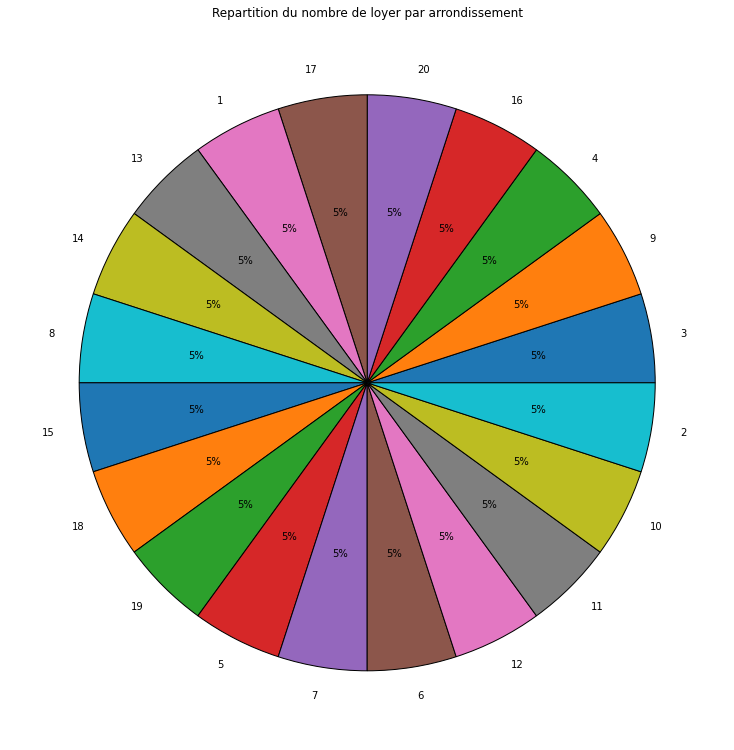

In [532]:
slices = enloyer["ARRONDISSEMENT"].value_counts()
labels = enloyer["ARRONDISSEMENT"].unique()

fig = plt.figure(figsize=(10,10))
axes = fig.add_axes([0, 0, 1, 1], aspect=1)
axes.pie(slices, labels=labels,wedgeprops={'edgecolor':'black'},autopct='%1.0f%%')
axes.set_title("Repartition du nombre de loyer par arrondissement")
plt.show()

On peut supposer que le nombre de loyer a été mis de façon équivalente car il serait étonant que se soit le cas.

In [ ]:
...

In [586]:
df = pd.DataFrame()
cols = ["ARRONDISSEMENT","LOYERS_DE_REFERENCE","LOYERS_DE_REFERENCE_MAJORES","LOYERS_DE_REFERENCE_MINORES"]
df = enloyer[cols].groupby("ARRONDISSEMENT").mean().round(2)
df = geo.merge(df,on='ARRONDISSEMENT')
df1 = gpd.GeoDataFrame(df, geometry='GEO_ARRONDISSEMENT')

paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
paris.choropleth(geo_data = df1,
                 name='Loyers de référence majorés moyen par arrondissement',
                 data = df1, 
                 columns = ["ARRONDISSEMENT","LOYERS_DE_REFERENCE_MAJORES"],
                 key_on = 'feature.properties.ARRONDISSEMENT',
                 fill_color='YlOrRd',
                 fill_opacity=0.6, 
                 line_opacity=0.1,
                 legend_name='Loyers de référence majorés moyen par arrondissement', 
                 smooth_factor=0,
                 highlight=True)

SuburbName = folium.features.GeoJson(
    df1,
    control=False,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['ARRONDISSEMENT'
                ,'LOYERS_DE_REFERENCE'
                ,'LOYERS_DE_REFERENCE_MAJORES'
                ,'LOYERS_DE_REFERENCE_MINORES'
               ],
        aliases=['Arrondissement: '
                ,'Loyers de référence: '
                ,'Loyers de référence majorés: '
                ,'Loyers de référence minorés: '
                 ],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
paris.add_child(SuburbName)
paris.keep_in_front(SuburbName)
#folium.LayerControl().add_to(paris)

paris

/Users/steven/opt/anaconda3/lib/python3.9/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


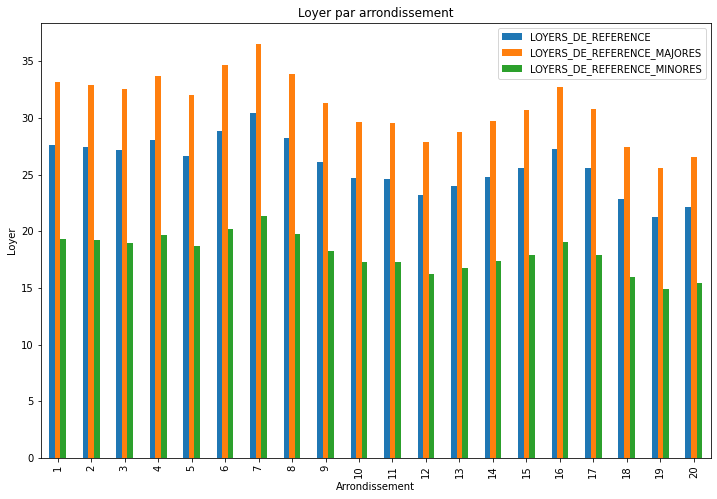

In [536]:
#enloyer[loyer+["Arrondissement"]].groupby("Arrondissement").mean()
cols = ["ARRONDISSEMENT","LOYERS_DE_REFERENCE","LOYERS_DE_REFERENCE_MAJORES","LOYERS_DE_REFERENCE_MINORES"]
df = enloyer[cols].groupby("ARRONDISSEMENT").mean()
df.reset_index(inplace=True)

df.plot.bar(x='ARRONDISSEMENT',figsize=(12,8))
plt.xlabel("Arrondissement")
plt.ylabel("Loyer")
plt.legend()
plt.title("Loyer par arrondissement")
plt.show()

On peut voir que la différence entre les différents loyer de référence reste la même pour les différents arrondissements.

On peut également remarquer que certains arrondissements ont des loyers majorès supérieur au autres.
Il serait intéressant de faire une jonction entre les loyers et les signalements :
 - on pourrait en déduire que certains quarties ont des logements plus bas en lien avec le nombre de signalement
 - ou à l'inverse que des arrondissement aux loyers plus hauts sont plus suceptible de faire un signalement


...

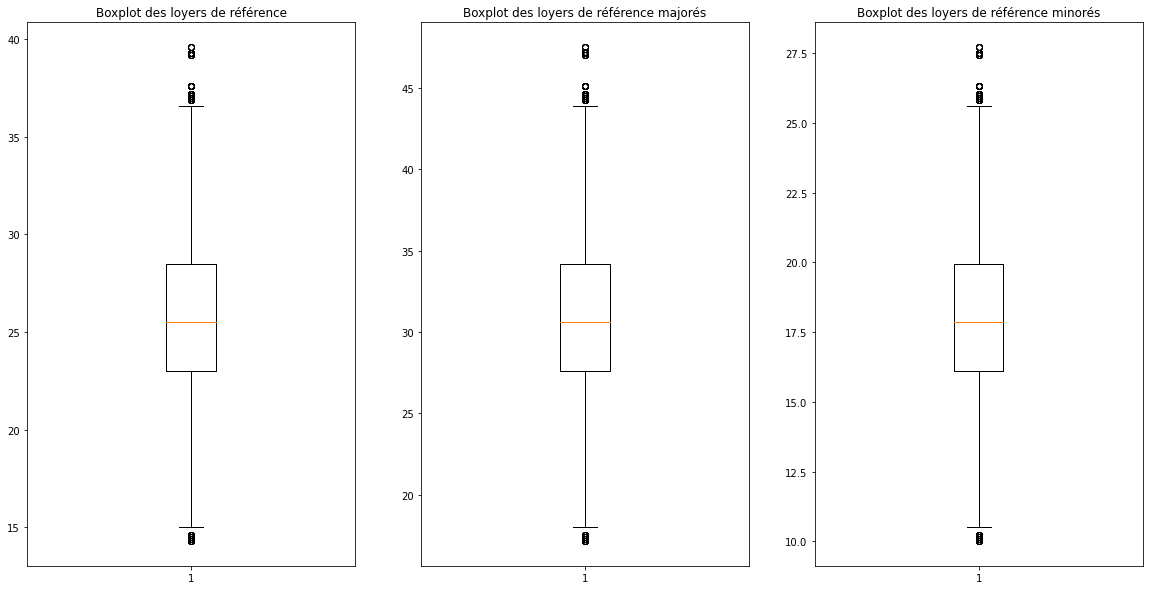

In [571]:
cols = ["LOYERS_DE_REFERENCE","LOYERS_DE_REFERENCE_MAJORES","LOYERS_DE_REFERENCE_MINORES"]
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,10))

axes[0].boxplot(enloyer["LOYERS_DE_REFERENCE"])
axes[0].set_title("Boxplot des loyers de référence")

axes[1].boxplot(enloyer["LOYERS_DE_REFERENCE_MAJORES"])
axes[1].set_title("Boxplot des loyers de référence majorés")

axes[2].boxplot(enloyer["LOYERS_DE_REFERENCE_MINORES"])
axes[2].set_title("Boxplot des loyers de référence minorés")
    
plt.show()

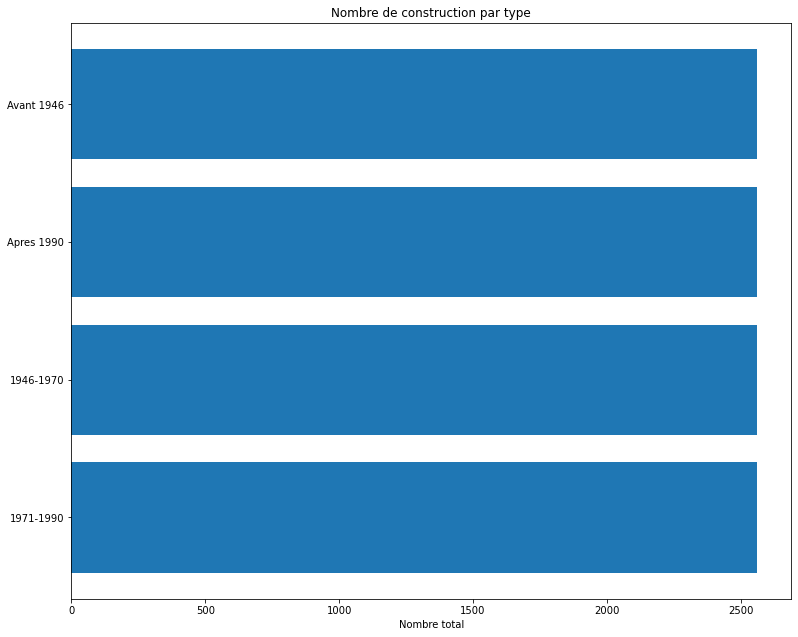

In [574]:
values1 = enloyer["EPOQUE_DE_CONSTRUCTION"].value_counts()
keys1 = enloyer["EPOQUE_DE_CONSTRUCTION"].unique()

fig = plt.figure(figsize=(10,8))
axes = fig.add_axes([0,0,1,1])
axes.barh(keys1, values1)
axes.set_title("Nombre de construction par type")
axes.set_xlabel("Nombre total")
#axes.set_ylabel("Type de déclaration")
#fig.tight_layout()
plt.show()

On peut supposer que le nombre de loyer par type a été mis de façon équivalente car il serait étonant que se soit le cas.

...

D'autres visualisation pourraient être faite mais on se limitera à cela, car on veut surtout s'intéresser aux jointures

### Fonctions d’agrégation et enrichissement du dataset (pivot_table!)

Des foncitons d'aggrégations ont déjà été utilisé dans la partie précédente, on va donc essayer surtout dans cette partie de pousser l'analyse à partir des visualisations précedentes

#### 'Dans Ma Rue - Anomalies signalées'

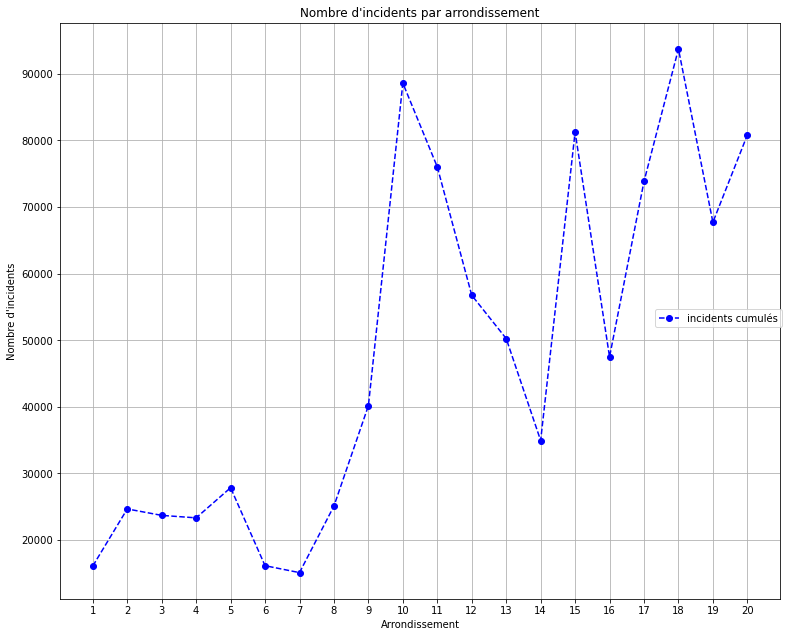

In [614]:
df1 = dansmarue["ARRONDISSEMENT"].value_counts(sort=True)

df1.sort_index(inplace=True)


fig = plt.figure(figsize=(10,8))
axes = fig.add_axes([0,0,1,1])
axes.plot(df1, 'b--',marker='o',label='incidents cumulés')
axes.set_xlabel("Arrondissement")
axes.set_ylabel("Nombre d'incidents")
axes.set_title("Nombre d'incidents par arrondissement")
axes.set_xticks(range(1,21))
axes.grid()
fig.legend(loc='center right')
plt.show()

Une chose que l'on remarque est que plus on s'éloigne de la coronne de Paris, plus le nombre de signalement augmente.
Ce qui peut être expliqué par la proximité au banlieu.

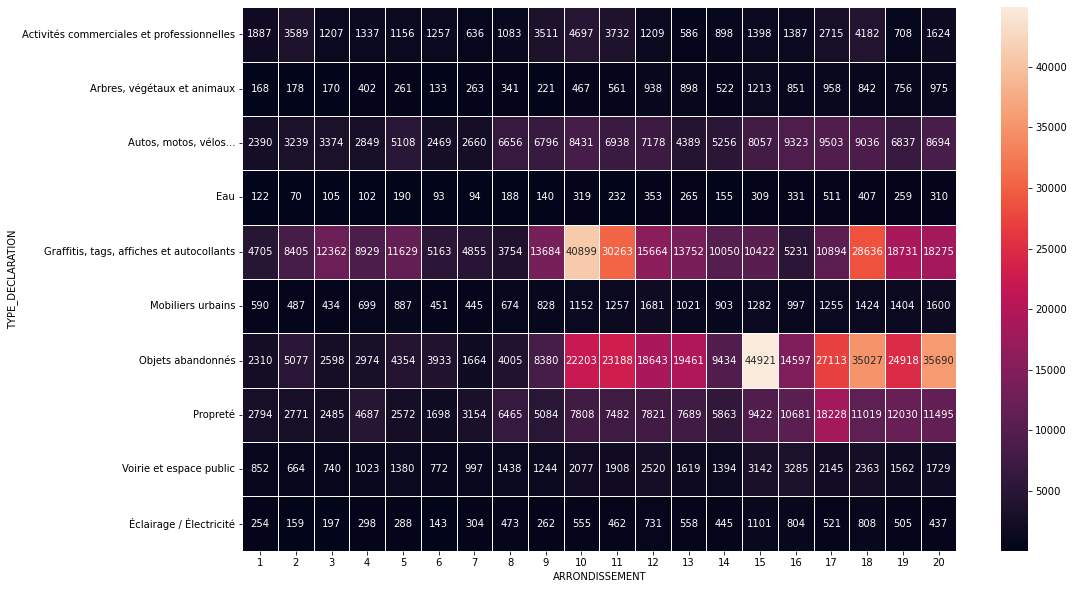

In [626]:
df = dansmarue.copy()
df["COUNT"] = 1
dt = pd.pivot_table(df,index='TYPE_DECLARATION',columns='ARRONDISSEMENT',values="COUNT",aggfunc='sum')
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(dt, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.show()

On remarque les objets abandonnées, les 'Graffitis,tag,affiches et autocollants', la propreté et 'Autos, motos, vélos' constitue les signalements les plus fréquents en particulier à partir de l'arrondissement 8 à 20.

#### 'Logement - Encadrement des loyers'

On remarquera dans les heatmap suivantes les LIMITES du dataset, car le nombre de valeurs à été uniformiser par catégorie

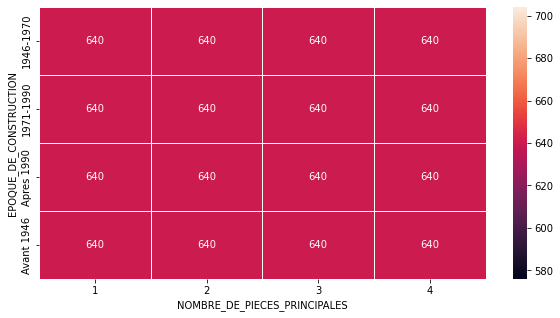

In [635]:
df = enloyer.copy()
df["COUNT"] = 1
dt = pd.pivot_table(df,index='EPOQUE_DE_CONSTRUCTION',columns='NOMBRE_DE_PIECES_PRINCIPALES',values="COUNT",aggfunc='sum')
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(dt, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.show()

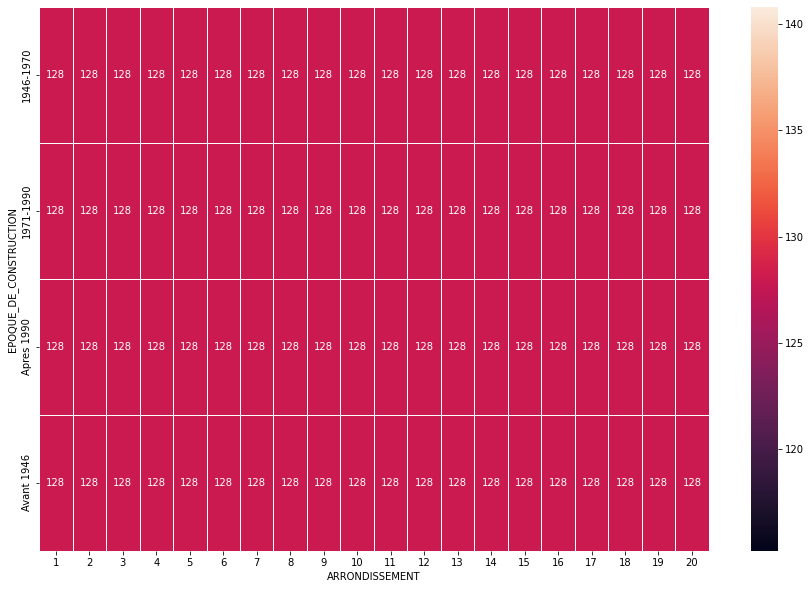

In [633]:
df = enloyer.copy()
df["COUNT"] = 1
dt = pd.pivot_table(df,index='EPOQUE_DE_CONSTRUCTION',columns='ARRONDISSEMENT',values="COUNT",aggfunc='sum')
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(dt, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.show()

Heureusement ;)...

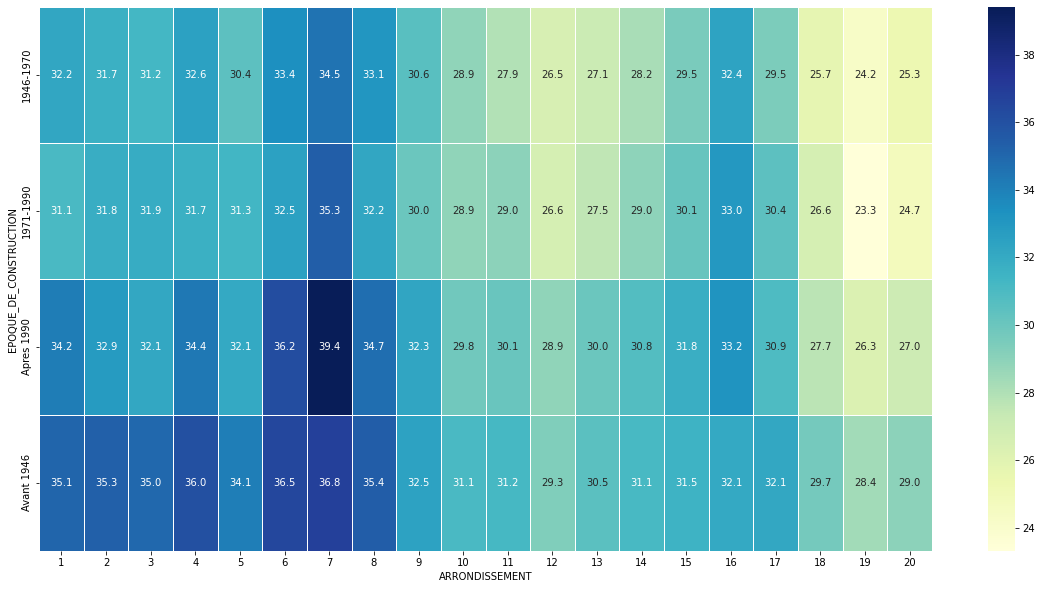

In [643]:
df = enloyer.copy()
df["COUNT"] = 1
dt = pd.pivot_table(df,index='EPOQUE_DE_CONSTRUCTION',columns='ARRONDISSEMENT',values="LOYERS_DE_REFERENCE_MAJORES",aggfunc='mean')
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dt, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="YlGnBu")
plt.show()

On remarque que, dans la couronne parisienne en particulier, que plus un habitat est ancien plus le prix du loyers de référence majorés est haut comparés au arrondissement autour de la couronne.

#### Jointures des 2 datasets

D'autres heatmap pour les 2 dataset aurait pue être faite mais en les mettant à côte à côte qu'il pourit y avoir une correspondance..

In [654]:
df = dansmarue.copy()
df["COUNT"] = 1

df2 = enloyer.copy()
df2["COUNT"] = 1

dt = pd.pivot_table(df,index='TYPE_DECLARATION',columns='ARRONDISSEMENT',values="COUNT",aggfunc='sum')
dt2 = pd.pivot_table(df2,index='EPOQUE_DE_CONSTRUCTION',columns='ARRONDISSEMENT',values="LOYERS_DE_REFERENCE_MAJORES",aggfunc='mean')

#f, ax = plt.subplots(figsize=(16, 10))
#axes.heatmap(dt, annot=True, fmt="d", linewidths=.5, ax=ax)
#axes.heatmap(dt, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="YlGnBu")
#Manque de temps

## Parties 3

### Problématique

On s'est demandé qu'elles pouvaient être les liens, s'il en existe, entre le signalement d'incidents par rapport loyer de référence selon les arrondissements.

### Justification des champs “enrichis”, jointures

La jointure peut être intéressante car on remarque que plus on s'éloigne de la couronne parsienne plus le signalement d'incident augmente de façon relatif (attention peutvouloir dire quelque chose mais peut aussi être une simple corrélation san réel sens).

Faire une analyse plus poussée, après du ML par exemple pourrait donner plus d'informations sur la viabilité d'une corrélation.

Cette étude pourrait être utiliser par exemple dans le cas d'essayer d'uniformiser les loyers de référence à Paris et de façon plus général ce rendre compte/prévenir des signalements les plus récurrents dans les zones les plus touchés.

In [ ]:
from sklearn.linear_model import LinearRegression

x = df["NB INCIDENTS"].to_numpy().reshape((-1, 1))
y = df["LOYERS_DE_REFERENCE"].to_numpy()

model = LinearRegression().fit(x, y)
Rcarré = model.score(x, y)
print('Score R²:', Rcarré)

xfit = np.linspace(10000, 100000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit,color="red",label="Régression linéaire")
plt.xlabel("Nombre d'anomalies")
plt.ylabel("Loyer de référence en euros par mètre carré")
plt.legend()
plt.title("Relation entre le nombre d'anomalies et le prix du loyer par arrondissement")
plt.show()

### Création et exportation du dataset prêt à l’emploi pour de l’analyse, du ML….

In [ ]:
#dansmarue.to_csv('signalement.csv')
#enloyer.to_csv('loyer.csv')